## Data Cleaning & Exploration
For this personal project, I used the an open dataset of data on various types of cereal and the corresponding customer ratings

### Data exploration

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('cereal.csv')
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [5]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


The first look to our data tells us:
- We have a data set with 77 observations.
- There are no missing values in our data set.
- We have some negative values (min) in carbo, sugars, and potass which is not normal to have in nutrition information. This could mean there are some errors in our data.


#### Creating a new column categorizing the cereals between Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other

In [6]:
df['cereal_category'] = df['name']
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cereal_category
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,100% Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,100% Natural Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,All-Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,All-Bran with Extra Fiber
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Almond Delight


In [7]:
df['cereal_category'].unique()

array(['100% Bran', '100% Natural Bran', 'All-Bran',
       'All-Bran with Extra Fiber', 'Almond Delight',
       'Apple Cinnamon Cheerios', 'Apple Jacks', 'Basic 4', 'Bran Chex',
       'Bran Flakes', "Cap'n'Crunch", 'Cheerios', 'Cinnamon Toast Crunch',
       'Clusters', 'Cocoa Puffs', 'Corn Chex', 'Corn Flakes', 'Corn Pops',
       'Count Chocula', "Cracklin' Oat Bran", 'Cream of Wheat (Quick)',
       'Crispix', 'Crispy Wheat & Raisins', 'Double Chex', 'Froot Loops',
       'Frosted Flakes', 'Frosted Mini-Wheats',
       'Fruit & Fibre Dates; Walnuts; and Oats', 'Fruitful Bran',
       'Fruity Pebbles', 'Golden Crisp', 'Golden Grahams',
       'Grape Nuts Flakes', 'Grape-Nuts', 'Great Grains Pecan',
       'Honey Graham Ohs', 'Honey Nut Cheerios', 'Honey-comb',
       'Just Right Crunchy  Nuggets', 'Just Right Fruit & Nut', 'Kix',
       'Life', 'Lucky Charms', 'Maypo',
       'Muesli Raisins; Dates; & Almonds',
       'Muesli Raisins; Peaches; & Pecans', 'Mueslix Crispy Blend',
  

From the information we collected in the column 'name', we can observe that:
- There are some cereals that contains two catergories words in their name, for this case we will asume they belong to either of both (the first one to be recognized).
- Some cereals contain the word Fibre instead of Fiber.
- There are no high protein cereals on this data set.


In [8]:
def cereal_cat(i):   
       
    if re.compile(r'Bran').search(i):
        return('Bran')
    elif re.compile(r'Wheat').search(i):
        return('Wheat')
    elif re.compile(r'Fiber').search(i) or re.compile(r'Fibre').search(i):
        return('Fiber')
    elif re.compile(r'Protein').search(i):
        return('Protein')
    elif re.compile(r'Crunch').search(i):
        return('Crunch')
    elif re.compile(r'Corn').search(i):
        return('Corn')
    elif re.compile(r'Nut').search(i):
        return('Nut')
    elif re.compile(r'Rice').search(i):
        return('Rice')
    else:
        return('Other')

In [9]:
df['cereal_category'] = df['cereal_category'].apply(cereal_cat)

In [10]:
df.groupby(['cereal_category'])['name'].count()

cereal_category
Bran      13
Corn       4
Crunch     4
Fiber      1
Nut        5
Other     36
Rice       3
Wheat     11
Name: name, dtype: int64

#### Identifying the negative values in the data set and replace them with the median value for that column.

From line [4] (describe() function) we observed that the columns carbo, sugars, and potass had negative values. I created a function that will return NaN if the values on the column are negative, and then I used the fucntion fillna to fill up these values with their respective mean.

In [11]:
def negative_values(i):
    if i<0:
        return
    else: 
        return i

In [12]:
df['carbo'] = df['carbo'].apply(negative_values)
df['sugars'] = df['sugars'].apply(negative_values)
df['potass'] = df['potass'].apply(negative_values)

In [13]:
df['carbo'] = df['carbo'].fillna(round(df['carbo'].mean()))
df['sugars'] = df['sugars'].fillna(round(df['sugars'].mean()))
df['potass'] = df['potass'].fillna(round(df['potass'].mean()))

In [14]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cereal_category
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,Bran
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,99.0,25,3,1.0,0.75,34.384843,Other


In [15]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.805195,7.025974,98.675325,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.881600,4.349755,69.478024,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,45.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,15.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


Now we observe that the min value for carbo, sugars, and potass is different to -1. Also, by doing a quick check, in line[5], our fourth entry had a value of -1 in potass. By looking at line [16], we can observe that this valkue was effectively changed by the round mean of the column.

#### Standardizing the 'weight' column to 1. 

For this step, I wrote a function to divide the remaining columns which contain nutritional information by the corresponding value in the weight column. I took only the columns that have nutritional information that is affected by the weigh. This means that I will not edit the columns with strings on it, because they do not represent a nutritional value based on weight, and also columns 'shelf' and 'rating',because these columns represent nutritional information based on the kind of ingredients being used to prepare the cereal, and not on the weight of the portions being served. 

In [16]:
df2 = df.drop(columns=['shelf','rating'])
cols_nutr = df2.select_dtypes(exclude=['object']).columns

def normalize_weight(row):
  val_weight = row["weight"]
  for col in cols_nutr:
    row[col] = row[col] / val_weight
  return row

In [17]:
df = df.apply(normalize_weight, axis=1)
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0,77.000000,77.000000
mean,103.996910,2.490851,0.967279,153.356701,2.052066,14.630411,6.659386,94.003430,26.873265,2.207792,1.0,0.825846,42.665705
std,13.851864,1.084322,0.983707,82.768011,2.302014,4.202134,4.066710,62.801366,20.511148,0.832524,0.0,0.316171,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,20.000000,0.000000,1.000000,1.0,0.250000,18.042851
25%,100.000000,2.000000,0.000000,125.000000,1.000000,11.500000,3.000000,45.000000,25.000000,1.000000,1.0,0.666667,33.174094
50%,106.666667,2.255639,1.000000,157.894737,1.538462,14.000000,6.015038,90.000000,25.000000,2.000000,1.0,0.750000,40.400208
75%,110.000000,3.000000,1.333333,200.000000,3.000000,17.000000,10.000000,114.457831,25.000000,3.000000,1.0,1.000000,50.828392
max,150.000000,6.000000,5.000000,320.000000,14.000000,26.000000,15.000000,330.000000,100.000000,3.000000,1.0,2.000000,93.704912


As seen on the new result from the describe function, our column weight has a mean and a std = 1, which means that our columns was propperly normalized. Also, by checking row 7 of our data frame, we can observe that originally the weight was 1.33. Now, in the new df normalized by weight, we can observe that the values in this row have correctly changed.

#### Creating a new column to categorize the cereals between healthy and unhealthy. Healthy cereals can were defined as those which have low calories (<100), low sodium (<150), low sugar (<9) high fiber (>3), and high protein (>2). All other cereals are unhealthy.

For this question I used a lambda function to easily categorize our cereals into healty as True and unhealthy as False, according to the suggestion made on the question. 

In [18]:
df['is_healthy'] = df.apply(lambda x: ((x['calories']<100.0) and 
                                       (x['sodium']<150.0 )  and
                                       (x['sugars']<9.0 )    and
                                       (x['fiber']>3.0 )     and
                                       (x['protein']>2.0)), axis=1)

In [19]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cereal_category,is_healthy
0,100% Bran,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3,1.0,0.33,68.402973,Bran,True
1,100% Natural Bran,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3,1.0,1.00,33.983679,Bran,False
2,All-Bran,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3,1.0,0.33,59.425505,Bran,False
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3,1.0,0.50,93.704912,Bran,True
4,Almond Delight,R,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,99.0,25.0,3,1.0,0.75,34.384843,Other,False


Text(0.5, 1.0, 'Healthy vs Unhealthy cereals')

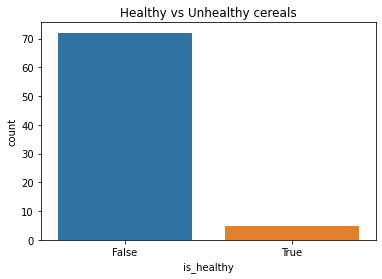

In [20]:
sns.countplot(x='is_healthy',data=df).set_title("Healthy vs Unhealthy cereals")

In [21]:
df.groupby(['is_healthy'])['name'].count()/df['name'].count()*100

is_healthy
False    93.506494
True      6.493506
Name: name, dtype: float64

There are very few cereals that comply with the classification of 'healthy'. Only 6.4% of the cereals can be considered healthy.

#### Identifying what % of cereals that each manufacturer produces are healthy.

In [22]:
total_mfr = df.groupby(['mfr'])['name'].count().to_frame()
total_healthy = df.groupby(['mfr'])['is_healthy'].aggregate(['sum'])
total_healthy['Healthy cereals [%]'] = round((total_healthy['sum']/total_mfr['name'])*100,2)
total_healthy

,sum,Healthy cereals [%]
mfr,,
A,0,0.00
G,0,0.00
K,1,4.35
N,3,50.00
P,1,11.11
Q,0,0.00
R,0,0.00


As seen in the table above, only 3 manufacturers actually produces healthy cereals. N is the manufacturer that actually produces the biggest quantity of healthy cereals in is production, with 50% of its products on the data frame ebing classified as healthy. 

#### Calculating the average, minimum and maximum ratings for healthy vs. unhealthy

In [23]:
df.groupby(['is_healthy'])['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
is_healthy,,,,,,,,
False,72.0,40.826743,11.758911,18.042851,32.014680,39.481299,49.580767,72.801787
True,5.0,69.146753,18.906155,40.917047,68.235885,68.402973,74.472949,93.704912


By usign the fucntion groupby and describe we can easily obtain the average and the range of ratings for healthy vs unhealthy cereals, as well as other parameters like the std and the quartiles.


#### Calculating the average, minimum and maximum ratings for each type of cereal: Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other.

In [24]:
df.groupby(['cereal_category'])['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
cereal_category,,,,,,,,
Bran,13.0,50.714179,18.703060,28.592785,39.259197,41.015492,59.425505,93.704912
Corn,4.0,40.482720,4.268708,35.782791,38.075507,40.142383,42.549595,45.863324
Crunch,4.0,26.078598,8.709912,18.042851,19.378393,24.873929,31.574134,36.523683
Fiber,1.0,40.917047,NaN,40.917047,40.917047,40.917047,40.917047,40.917047
Nut,5.0,42.736791,9.744486,31.072217,36.471512,40.692320,52.076897,53.371007
Other,36.0,37.281694,9.732518,21.871292,30.112399,36.145503,45.448984,55.333142
Rice,3.0,47.771735,11.267789,40.560159,41.279546,41.998933,51.377522,60.756112
Wheat,11.0,56.333863,11.942876,36.176196,50.689819,59.363993,63.769730,72.801787


As  done in the question before, we can use the function group by and describe to calculate the average, the range and other parameters based on the rating and the type of cereal


#### Car chart which shows how many of each type of cereal each manufacturer produces.

First, we need to groupby our dataframe by categories of cereals and manufacturer. As not all manufacturers produce all type of cereals, we need to fill up this information with 0 to make sure our data frame has the same lenght for all columns. Then, we can use pandas stacked bar plot to create our graph.

In [25]:
mfr_cereals = df.groupby(['cereal_category','mfr'])['name'].count().unstack('mfr').fillna(0)
mfr_cereals

mfr,A,G,K,N,P,Q,R
cereal_category,,,,,,,
Bran,0.0,2.0,5.0,2.0,2.0,1.0,1.0
Corn,0.0,1.0,2.0,0.0,0.0,0.0,1.0
Crunch,0.0,1.0,2.0,0.0,0.0,1.0,0.0
Fiber,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Nut,0.0,1.0,2.0,0.0,2.0,0.0,0.0
Other,1.0,14.0,9.0,0.0,4.0,4.0,4.0
Rice,0.0,0.0,1.0,0.0,0.0,1.0,1.0
Wheat,0.0,3.0,2.0,4.0,0.0,1.0,1.0


Text(0, 0.5, 'Count')

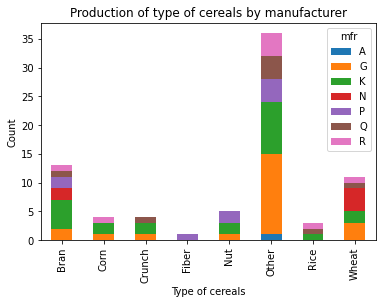

In [26]:
mfr_cereals.plot(kind='bar', stacked=True)
plt.title("Production of type of cereals by manufacturer")
plt.xlabel("Type of cereals")
plt.ylabel("Count")

### Question 9. 

#### Create a 3-dimensional scatterplot which shows the relationship between rating and calories; the 3-rd dimension should be reflected in the color of the dots and should highlight whether the cereal is categorized as healthy or unhealthy.

<AxesSubplot:xlabel='calories', ylabel='rating'>

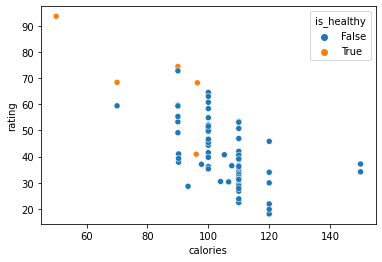

In [27]:
sns.scatterplot(x=df['calories'],y=df['rating'],hue=df['is_healthy'])

From our scatterplot we can observe that our data is widely distributed and that only a few cereals are classified under healthy. Also, we can observe that most of healthy cereals except for one, have a rating around 70 or above.

### Question 10.

#### Which shelf has the most healthy cereals?

In [28]:
df.groupby(['shelf','is_healthy'])['name'].count().to_frame()

name
shelf is_healthy      
1     False         18
      True           2
2     False         21
3     False         33
      True           3

We can onbserve that the shelf with the most quantity of healthy cereals is shelf 3, and that shelf 2 have no healthy cereals at all